In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("SMSSpamCollection.csv", names=["label","text"])

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
df.shape

(5572, 2)

In [6]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df["text"].duplicated().sum()

403

In [9]:
df[df["text"].duplicated()]

,label,text
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(5169, 2)

<h1>Data Transformation</h1>

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import regexp_tokenize

In [13]:
def clean_tokenize_stop(text):
    
    characters = r"(\w+|\w!|!|\d)"
    cleaned = regexp_tokenize(text, characters) #transform text into lower cases
        
    #Removing stopwords or common words which dont add any meaning
    stopwords_ = stopwords.words("english")
    cleaned2 = [item for item in cleaned if item not in stopwords_]
    
    cleaned3 = [PorterStemmer().stem(word) for word in cleaned2]
    cleaned4 = [WordNetLemmatizer().lemmatize(word) for word in cleaned3] # running runs
    
    cleaned5 = ' '.join([word for word in cleaned4]) 
                
    return cleaned5

In [14]:
df["text"] = df["text"].apply(clean_tokenize_stop)

In [15]:
df["text"]

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                  nah i think goe usf live around though
                              ...                        
5567    thi 2nd time tri 2 contact u u 750 pound prize...
5568                         will ü b go esplanad fr home
5569                                 piti mood so suggest
5570    the guy bitch i act like interest buy someth e...
5571                                    rofl it true name
Name: text, Length: 5169, dtype: object

In [16]:
allwords = ' '.join([word for word in df['text']])

(-0.5, 1199.5, 499.5, -0.5)

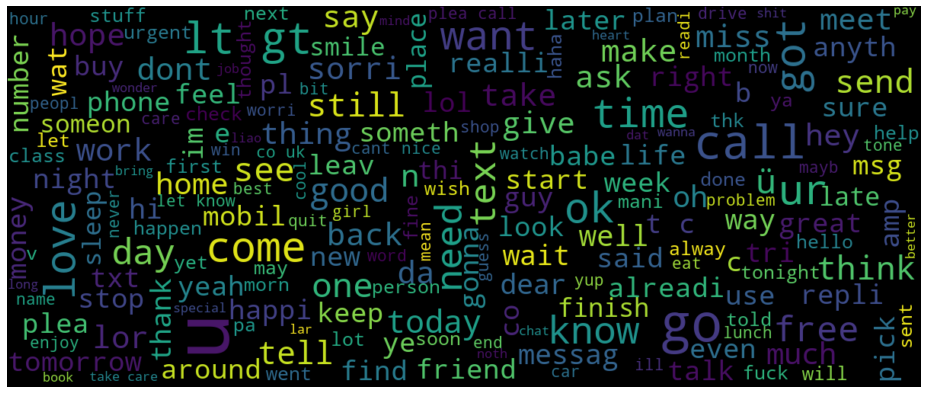

In [18]:
#Plotting some word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=1200, 
                     height=500, 
                     random_state=2, 
                     max_font_size=100).generate(allwords)

plt.figure(figsize=(17, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

<h1>Data Modeling</h1>

<h3>XGBoost</h3>

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [20]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["text"])
y = preprocessing.LabelEncoder().fit_transform(df["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
xgb = XGBClassifier().fit(X_train, y_train)

In [22]:
print("Test data score: ", xgb.score(X_test, y_test))
print("Train data score: ", xgb.score(X_train, y_train))

Test data score:  0.9774339136041263
Train data score:  0.992260917634052


In [23]:
df["text"][0:5]

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri 2 wkli comp win fa cup final tkt 21...
3                  u dun say earli hor u c alreadi say
4               nah i think goe usf live around though
Name: text, dtype: object

In [24]:
print(xgb.predict(X_test[0:10]))

[0 0 0 0 0 0 0 0 1 1]


In [25]:
y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [26]:
sample_text = "You won a brand new car contact us to claim your price"

In [27]:
sample_text = [clean_tokenize_stop(sample_text)]

In [28]:
sample_text = vectorizer.transform(sample_text)

In [29]:
print(sample_text)

  (0, 7269)	0.2602543351647686
  (0, 5179)	0.42537931642128113
  (0, 4557)	0.31725417450300003
  (0, 2000)	0.35717416201462293
  (0, 1862)	0.33640229741235717
  (0, 1710)	0.3858906750333723
  (0, 1550)	0.5108996047722646


In [30]:
xgb.predict(sample_text)

array([0])

<h3>Logistic Regression</h3>

In [31]:
lgr = LogisticRegression().fit(X_train, y_train)

In [32]:
print("Test data score: ", lgr.score(X_test, y_test))
print("Train data score: ", lgr.score(X_train, y_train))

Test data score:  0.9574468085106383
Train data score:  0.9629629629629629


In [33]:
lgr.predict(sample_text)

array([1])

In [34]:
print(lgr.predict(X_test[0:10]))

[0 0 0 0 0 0 0 0 1 1]


<h3>Support Vector Machines</h3>

In [35]:
svc = SVC().fit(X_train, y_train)

In [36]:
print("Test data score: ", svc.score(X_test, y_test))
print("Train data score: ", svc.score(X_train, y_train))

Test data score:  0.9742101869761445
Train data score:  0.9975124378109452


In [45]:
stext = "hello"

In [47]:
svc.predict(sample_text)

array([1])

In [38]:
print(svc.predict(X_test[0:10]))

[0 0 0 0 0 0 0 0 1 1]
